In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinic_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merged_df = pd.merge(clinic_df, mouse_df, on="Mouse ID")

# Display the data table for preview
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor = merged_df
tumor = tumor.groupby(['Drug', 'Timepoint'])
tumor_mean = tumor["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
tumor_df = pd.DataFrame (tumor_mean)
# Preview DataFrame
tumor_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_serror = tumor["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
tumor_error_df = pd.DataFrame(tumor_serror)
# Preview DataFrame
tumor_error_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
...                                 ...
Zoniferol 25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_pivot = tumor_df.pivot_table(index=["Timepoint"], values="Tumor Volume (mm3)", columns=["Drug"])
tumor_error_pivot = tumor_error_df.pivot_table(index=["Timepoint"], values="Tumor Volume (mm3)", columns=["Drug"])
# Preview that Reformatting worked
tumor_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
tumor_error_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


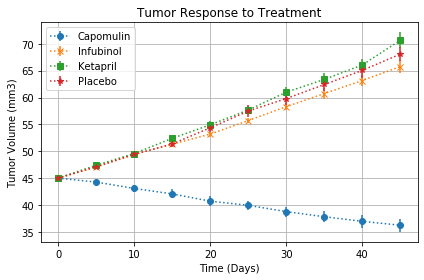

In [6]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, 50, 5)
fig, ax = plt.subplots()

#for drugs in tumor_pivot.columns:
#    ax.errorbar(x_axis, tumor_pivot[drugs], yerr=tumor_error_pivot[drugs], label=drugs, linestyle=':')

ax.errorbar(x_axis, tumor_pivot["Capomulin"], yerr=tumor_error_pivot["Capomulin"], marker='o', linestyle=':', label='Capomulin')
ax.errorbar(x_axis, tumor_pivot["Infubinol"], yerr=tumor_error_pivot["Infubinol"], marker='x', linestyle=':', label='Infubinol')
ax.errorbar(x_axis, tumor_pivot["Ketapril"], yerr=tumor_error_pivot["Ketapril"],marker='s', linestyle=':', label='Ketapril')
ax.errorbar(x_axis, tumor_pivot["Placebo"], yerr=tumor_error_pivot["Placebo"], marker='*', linestyle=':', label='Placebo')

ax.set_xlabel('Time (Days)')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title('Tumor Response to Treatment')


plt.legend(loc='best')
plt.grid()
plt.tight_layout()

# Save the Figure
plt.savefig("Tumor-Response-to-Treatment.png")


In [7]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met = merged_df
met = met.groupby(['Drug', 'Timepoint'])
met_mean = tumor["Metastatic Sites"].mean()

# Convert to DataFrame
met_df = pd.DataFrame({'Metastatic Sites': met_mean})
# Preview DataFrame
met_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
met_serror = met["Metastatic Sites"].sem()

# Convert to DataFrame
met_error_df = pd.DataFrame({"Metastatic Sites": met_serror})

# Preview DataFrame
met_error_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
...                               ...
Zoniferol 25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [10]:
# Minor Data Munging to Re-Format the Data Frames
met_pivot = met_df.pivot_table(index=["Timepoint"], values="Metastatic Sites", columns=["Drug"])
met_error_pivot = met_error_df.pivot_table(index=["Timepoint"], values="Metastatic Sites", columns=["Drug"])

# Preview that Reformatting worked
met_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [11]:
met_error_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


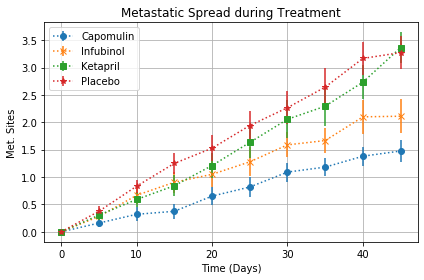

In [12]:
x_axis = np.arange(0, 50, 5)
fig, ax = plt.subplots()

ax.errorbar(x_axis, met_pivot["Capomulin"], yerr=met_error_pivot["Capomulin"], marker='o', linestyle=':', label='Capomulin')
ax.errorbar(x_axis, met_pivot["Infubinol"], yerr=met_error_pivot["Infubinol"], marker='x', linestyle=':', label='Infubinol')
ax.errorbar(x_axis, met_pivot["Ketapril"], yerr=met_error_pivot["Ketapril"],marker='s', linestyle=':', label='Ketapril')
ax.errorbar(x_axis, met_pivot["Placebo"], yerr=met_error_pivot["Placebo"], marker='*', linestyle=':', label='Placebo')

ax.set_xlabel('Time (Days)')
ax.set_ylabel('Met. Sites')
ax.set_title('Metastatic Spread during Treatment')


plt.legend(loc='best')
plt.grid()
plt.tight_layout()

# Save the Figure
plt.savefig("Metastatic-Spread-during-Treatment.png")



![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice = merged_df
mice = mice.groupby(['Drug', 'Timepoint'])
mice_count = mice["Mouse ID"].count()

# Convert to DataFrame
mice_df = pd.DataFrame({'Mice Count': mice_count})

# Preview DataFrame
mice_df.head()

Mice Count
Drug      Timepoint            
Capomulin 0                  25
          5                  25
          10                 25
          15                 24
          20                 23

In [14]:
# Minor Data Munging to Re-Format the Data Frames
mice_pivot = mice_df.pivot_table(index=["Timepoint"], values="Mice Count", columns=["Drug"])

# Preview the Data Frame
mice_pivot.head(15)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


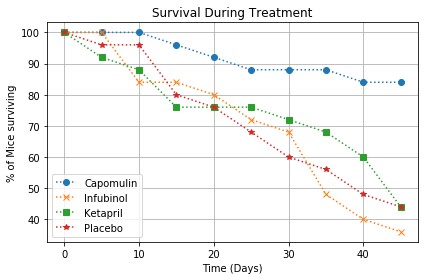

In [15]:
x_axis = np.arange(0, 50, 5)
#starting_mice_count = mice_pivot.loc['0', 'Drug']
fig, ax = plt.subplots()

plt.plot(x_axis, mice_pivot["Capomulin"] / mice_pivot.loc[0, 'Capomulin'] * 100, marker='o', linestyle=':', label='Capomulin')
plt.plot(x_axis, mice_pivot["Infubinol"] / mice_pivot.loc[0, 'Infubinol'] * 100, marker='x', linestyle=':', label='Infubinol')
plt.plot(x_axis, mice_pivot["Ketapril"] / mice_pivot.loc[0, 'Ketapril'] * 100, marker='s', linestyle=':', label='Ketapril')
plt.plot(x_axis, mice_pivot["Placebo"] / mice_pivot.loc[0, 'Placebo'] * 100, marker='*', linestyle=':', label='Placebo')

ax.set_xlabel('Time (Days)')
ax.set_ylabel('% of Mice surviving')
ax.set_title('Survival During Treatment')


plt.legend(loc='best')
plt.grid()
plt.tight_layout()

# Save the Figure
plt.savefig("survival.png")
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug
summary = merged_df
day_1 = summary.loc[summary["Timepoint"] == 0].groupby('Drug').mean() 
day_45 = summary.loc[summary["Timepoint"] == 45].groupby('Drug').mean()
diff = day_45 - day_1
percent_change = diff / day_1 * 100
percent_change = percent_change["Tumor Volume (mm3)"]
# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: Tumor Volume (mm3), dtype: float64

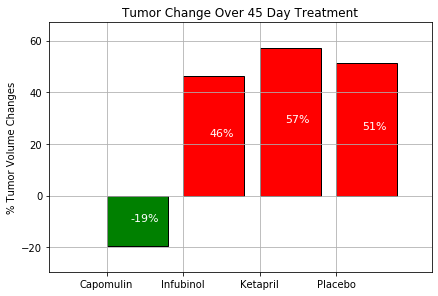

In [32]:
# Store all Relevant Percent Changes into a Tuple
Capomulin = round(percent_change['Capomulin'], 2)
Infubinol = round(percent_change['Infubinol'], 2)
Ketapril = round(percent_change['Ketapril'], 2)
Placebo = round(percent_change['Placebo'], 2)

tumor_percent_tuple = (Capomulin, Infubinol, Ketapril, Placebo)

# Splice the data between passing and failing drugs
figsize, ax = plt.subplots()

x_axis = np.arange(len(tumor_percent_tuple))
colors = ['green','red','red','red']
label = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
Percent= [-19.475303 , 46.123472, 57.028795,51.297960]
plt.bar(x_axis, tumor_percent_tuple, align='edge', color=colors, edgecolor='black')

# Orient widths. Add labels, tick marks, etc. 

label = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, label)
plt.xlim(-0.75, len(x_axis)+0.25)
plt.ylim(min(tumor_percent_tuple)-10, max(tumor_percent_tuple)+10)
plt.grid()
plt.tight_layout()
plt.ylabel("% Tumor Volume Changes")
plt.title("Tumor Change Over 45 Day Treatment")

# Use functions to label the percentages of changes

# Call functions to implement the function calls
#plt.text(0.25, -10, "-19%", color='white', horizontalalignment='left')
#plt.text(1, -10, "-46%", color='white', horizontalalignment='left')
#plt.text(0.25, -10, "-57%", color='white', horizontalalignment='left')
#plt.text(0.25, -10, "-51%", color='white', horizontalalignment='left')

for i, v in enumerate(Percent):
       plt.text(i+0.5 , v/2  , str(round(float(v))) + '%' , color='white' ,size=11 , horizontalalignment="center" ) 
        
# Save the Figure
plt.savefig("%-Volume-changes.png")

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)

In [18]:
#3 You must include a written description of three observable trends based on the data

#a) Results of Capomulin proved to be the successfull drug compared against the others in group.
#b) Capomulin has caused a significant decrease in tumor volume while others saw a rise.
#c) Spread of the tumor using Capomulin was the least compared the others in the dataset.
#d) The survival rate of the mice was the highest using Capomulin. 